## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction

For this project, we will be working to understand the results of an A/B test run by an e-commerce website. We will use the results to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)



`1.a)` Now, we will read in the `ab_data.csv` data and store it in `df`. We'll also take a look at the top few rows here.

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` We will use the below cell to find the number of rows in the dataset. 

In [31]:
df.shape

(69889, 7)

There are 69,889 rows.

`c)` Next, we will look at the proportion of users converted.

In [14]:
df['converted'].mean(axis=0)

0.13047832992316388

Approximately 13% of users were converted.

`d)` Do any of the rows have missing values? [Helpful Pandas Link One](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) and [Helpful Pandas Link Two](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

In [22]:
# calculating the sum of null values
df.isna().sum()

country      0
group        0
converted    0
dtype: int64

There are no null values.

`e)` How many customers are from each country? Build a bar chart to show the count of visits from each country.

In [8]:
# number of visitors from each country - pull the necessary code from the next cell to provide just the counts
df['country'].value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

In [30]:
df['group'].value_counts()

treatment    35211
control      34678
Name: group, dtype: int64

There were 48,850 visitors from the US, 17,551 from the UK, and 3,488 from CA. 

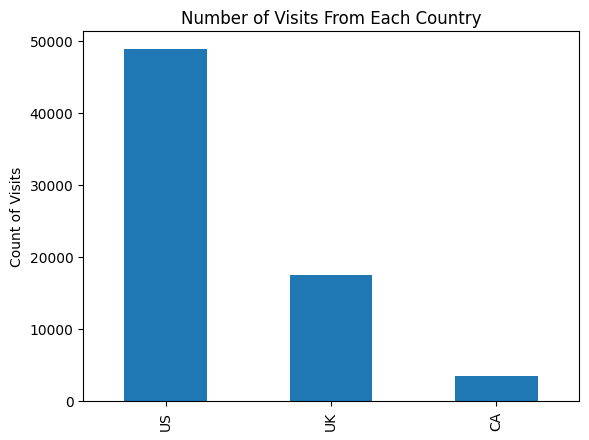

In [32]:
# bar chart of results 
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of our columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

The "converted" column is not categorical. It is an integer data type.

In [18]:
# viewing column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 


In [21]:
# viewing the number of unique values in each column
df.nunique()

country      3
group        2
converted    2
dtype: int64

The only values in the "converted" column are 0 and 1. When we use .nunique(), we see there are only two values in this column. This makes sense as a binary option as the visitors are either converted or not converted.

<a id='probability'></a>
#### Part II - Probability

`1.` Now that we have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [25]:
df['converted'].mean(axis=0)

0.13047832992316388

The overall chance of conversion is approximately 13%.

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

Individuals in the control group have an approximately 10.5% probability of conversion.

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

The chance of conversion is higher in the treatment group at approximately 15.5%.

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

The conversion rate for the control group is 10.5%. The conversion rate in the treatment group is 15.5%. It appears that there is a 5% higher chance of conversion in the treatment group.

`e)` What is the probability that an individual was in the `treatment`?

In [30]:
df.query('group == "treatment"').shape[0] / df.shape[0]

0.5038131894861853

The approximate probability of an indidivual being in the treatment group is 50.4%.

`f)` What is the probability that an individual was from Canada `CA`?

In [31]:
df.query('country == "CA"').shape[0] / df.shape[0]

0.04990771079855199

The probability of a visitor being from Canada was approximately 5%.

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [29]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

Approximately 13.3%.

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [28]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

Approximately 12.5%.

`i)` Do we see evidence that the `converted` rate might differ from one country to the next?

No, there is a less than 1% difference between the US and UK conversion rates.

`j)` The table below looks at how conversion by country and treatment group vary. Does it appear that there could be an interaction between how country and treatment impact conversion?




|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%          |  9.4%          |
| Treatment   | 15.8%       |  14.9%          |  15.4%          |

The conversion probabilities in the Treatment group are all within 1% of each other, regardless of country. The rates are within 1.3% in the Control group. At first glance, it does not appear that the country variable is significantly impacting the conversion rate.

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

In [ ]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

In [33]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"control"})) = 10.2\%$

$P(\text{converted} == 1|(\text{country} ==\text{"UK" AND }\text{group} ==\text{"treatment"})) = 14.9\%$

In [34]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"control"})) = 9.4\%$

$P(\text{converted} == 1|(\text{country} ==\text{"CA" AND }\text{group} ==\text{"treatment"})) = 15.4\%$

In [35]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.` Consider we need to make the decision just based on all the data provided.  If we want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, we must state our null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset. **All of these values are set below, and set the stage for the simulations we will run for the rest of this section.**

In [6]:
p_control_treatment_null  = df['converted'].mean()
print(p_control_treatment_null)
n_treatment = df.query('group == "treatment"').shape[0]
print(n_treatment)
n_control = df.query('group == "control"').shape[0]
print(n_control)

0.13047832992316388
35211
34678


`b)` We will use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  We will store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.

In [7]:
treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1-p_control_treatment_null, p_control_treatment_null])

`c)` We will use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  We will store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  


In [8]:
control_converted = np.random.choice([0, 1], size=n_control, p=[1-p_control_treatment_null, p_control_treatment_null])

`d)` Next, we will find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [11]:
p_treatment_simulated = treatment_converted.mean()
p_control_simulated = control_converted.mean()
print(p_treatment_simulated - p_control_simulated)

-0.0019533309419758615


`e)` Now we will simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one we calculated in parts **a. through g.** above.  We will store all 500 values in an numpy array called **p_diffs**. 

In [12]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.choice([0, 1], size=n_treatment, p=[1-p_control_treatment_null, p_control_treatment_null])
    control_converted = np.random.choice([0, 1], size=n_control, p=[1-p_control_treatment_null, p_control_treatment_null])
    # calculate p_treatment and p_control under the null
    p_treatment_simulated = treatment_converted.mean()
    p_control_simulated = control_converted.mean()
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment_simulated - p_control_simulated
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)

`f)` Now we will plot a histogram of the **p_diffs**.  Does this plot look like what we expected?  

<AxesSubplot: >

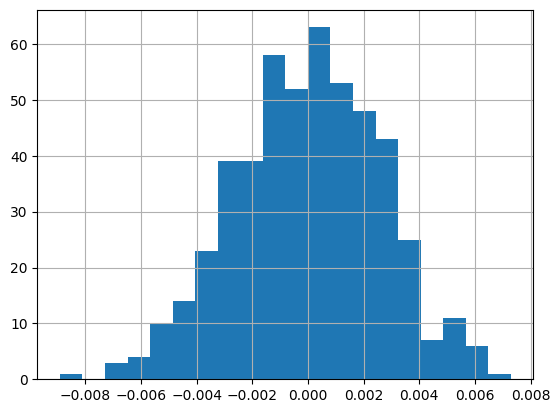

In [13]:
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [19]:
observed_diff = df.query('group == "treatment"')['converted'].mean() - df.query('group == "control"')['converted'].mean()
print(observed_diff)
proportion_greater_than_observed = np.mean(p_diffs > observed_diff)
print(proportion_greater_than_observed)

0.050066728877864425
0.0


`h)` In words, let's explain what was computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

This value is called the p-value. A p-value of less than 0.05 would indicate strong statistical evidence that the differences between the groups are not due to chance and we should reject the null hypothesis. Our p-value of 0.0 indicates that we should implement the new treatment page because the higher conversion rate on this page is statistically significant.

<a id='algorithms'></a>
### Part IV - Algorithms

`1.` In this final part, we will see that the result you acheived in the previous A/B test can also be acheived by performing regression.  

`a)` Since each row is either a conversion or no conversion, what type of regression should we be performing in this case?

We should use a logistic regression. This type of regression is used to predict categorical responses when there are only two possible outcomes. Our conversion column only has two possible outcomes (0 or 1).

The goal is to use **statsmodels** to fit the regression model specified in part `a)` to see if there is a significant difference in conversion based on which page a customer receives.  

`b)` However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  We'll add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [20]:
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Now, we'll create an `X` matrix and `y` response column that will be passed to the model, where we are testing if there is a difference in `treatment` vs. `control`.

In [21]:
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Next, we're using **statsmodels** to import and fit the regression model on the `X` and `y` from part `c)`. 

In [22]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Here is the summary of the model.

In [24]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                0.007175
Time:                        16:33:30   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead to the same conclusion drawn in the **Experiment** section.

The p-value associated with the ab_page is 0.0. This leads us to the same conclusion that was drawn in the Experiment section where we rejected the null hypothesis.

`2. a)` Now we will want to create two new columns as dummy variables for `US` and `UK`. 

In [26]:
### Create the necessary dummy variables
df[['US', 'UK']] = pd.get_dummies(df['country'])[['US', 'UK']]
df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,1,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Next, we'll create an `X` matrix and `y` response column that will be passed to the model, where we are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [27]:
X = df[['intercept', 'ab_page', 'US', 'UK']]
y = df['converted']

`c)` We're using **statsmodels** to import and fit the regression model on the `X` and `y` from part `b)`. 


In [28]:
logit_mod_country = sm.Logit(y, X)
logit_res_country = logit_mod_country.fit()

Optimization terminated successfully.
         Current function value: 0.384463
         Iterations 6


`d)` Below is a summary of the model.

In [29]:
print(logit_res_country.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69885
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                0.007312
Time:                        16:40:26   Log-Likelihood:                -26870.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.778e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1930      0.053    -41.308      0.000      -2.297      -2.089
ab_page        0.4466      0.023     19.534      0.000       0.402       0.491
US             0.0727      0.053      1.372      0.1

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

The p-value for the US is 0.170 and the p-value for the UK is 0.905. These values are both greater than 0.05. This indicates that neither country had a statistically significant impact on conversion results.